In [ ]:
# Author: Elahe Golrokh
# Repo: https://github.com/ElahehGolrokh/Road-Casualty-statistics

# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Cleaning**

## 1. read dataset

In [3]:
data_path = '/content/drive/MyDrive/Exercise/Python_Data_Science_and_Machine_Learning_project1_Dataset.zip'
!unzip -q $data_path

In [4]:
df = pd.read_csv('/content/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [ ]:
df.shape

(61352, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

## deep investigation in columns

In [5]:
df.drop(['status', 'lsoa_of_casualty', 'accident_year', 'accident_reference',
         'car_passenger', 'age_band_of_casualty', 'accident_index',
         'pedestrian_road_maintenance_worker',
         'pedestrian_movement', 'pedestrian_location',], axis=1, inplace=True)

In [6]:
categorical_features = ['casualty_class', 'sex_of_casualty', 'casualty_severity',
                        'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile',
                        'bus_or_coach_passenger']
numerical_features = ['vehicle_reference', 'casualty_reference', 'age_of_casualty']

print(len(categorical_features), len(numerical_features))
print('categorical_features = ', categorical_features)
print('numerical_features = ', numerical_features)

7 3
categorical_features =  ['casualty_class', 'sex_of_casualty', 'casualty_severity', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'bus_or_coach_passenger']
numerical_features =  ['vehicle_reference', 'casualty_reference', 'age_of_casualty']


In [7]:
# Remove outliers

contained_outliers = ['vehicle_reference', 'casualty_reference']
df_removed_outliers = df.copy()

for col in contained_outliers:
  for i in df_removed_outliers[col].index:
    if df_removed_outliers[col].loc[i] > 60:
      df_removed_outliers.drop(i, inplace=True)
  print(col, ' : ', df_removed_outliers[col].value_counts())

df_removed_outliers.shape

vehicle_reference  :  1    36255
2    23337
3     1427
4      227
5       71
6       19
7        7
8        4
9        3
Name: vehicle_reference, dtype: int64
casualty_reference  :  1     47790
2      9305
3      2795
4       934
5       325
6       100
7        37
8        15
9        11
10       10
11        7
12        6
14        4
13        4
15        3
16        2
22        1
Name: casualty_reference, dtype: int64


(61349, 10)

In [8]:
# Replace nan values with np.nan

df_categorical = df_removed_outliers.copy()
print('len of df_categorical before = ', len(df_categorical))
print('*******************************')

nan_1 = ['casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'age_of_casualty']
nan_1_9 = ['sex_of_casualty', 'bus_or_coach_passenger', ] # 9 -> Unknown or other

for col in nan_1:
  df_categorical[col][df_categorical[col]==-1] = np.nan

for col in nan_1_9:
  df_categorical[col][(df_categorical[col]==-1) | (df_categorical[col]==9)] = np.nan


print(df_categorical.isnull().sum())
df_categorical.dropna(inplace=True)
print('*******************************')
print('len of df_categorical after = ', len(df_categorical))


len of df_categorical before =  61349
*******************************
vehicle_reference             0
casualty_reference            0
casualty_class                0
sex_of_casualty             458
age_of_casualty            1350
casualty_severity             0
bus_or_coach_passenger       32
casualty_type                 5
casualty_home_area_type    5498
casualty_imd_decile        5784
dtype: int64
*******************************
len of df_categorical after =  54599


In [9]:
print(df_categorical.isnull().sum())


vehicle_reference          0
casualty_reference         0
casualty_class             0
sex_of_casualty            0
age_of_casualty            0
casualty_severity          0
bus_or_coach_passenger     0
casualty_type              0
casualty_home_area_type    0
casualty_imd_decile        0
dtype: int64


In [10]:
df_categorical_reindex = df_categorical.set_index(np.arange(len(df_categorical)))
df_categorical_reindex

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity,bus_or_coach_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2,1,1,2.0,46.0,3,0.0,9.0,1.0,9.0
1,1,1,1,1.0,30.0,3,0.0,9.0,1.0,2.0
2,1,1,1,2.0,58.0,3,0.0,9.0,1.0,10.0
3,2,3,1,2.0,78.0,3,0.0,9.0,2.0,10.0
4,3,2,1,1.0,63.0,3,0.0,9.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...
54594,1,1,1,1.0,69.0,2,0.0,4.0,1.0,7.0
54595,1,1,3,2.0,56.0,3,0.0,0.0,1.0,10.0
54596,2,1,1,1.0,42.0,3,0.0,9.0,1.0,5.0
54597,1,1,1,2.0,40.0,3,0.0,9.0,1.0,3.0


## Deal with categorical columns

In [11]:
# name different categories to ba able to analyze better

df_categorical_with_names = df_categorical_reindex.copy()

In [12]:
col = 'casualty_imd_decile'
df_categorical_with_names[col][(df_categorical_with_names[col]==2) |
                               (df_categorical_with_names[col]==3) |
                               (df_categorical_with_names[col]==1)] = 'more_deprived'
df_categorical_with_names[col][(df_categorical_with_names[col]==4) |
                               (df_categorical_with_names[col]==5) |
                               (df_categorical_with_names[col]==6) |
                               (df_categorical_with_names[col]==7)] = 'middle_deprived'
df_categorical_with_names[col][(df_categorical_with_names[col]==8) |
                               (df_categorical_with_names[col]==9) |
                               (df_categorical_with_names[col]==10)] = 'less_deprived'
df_categorical_with_names['casualty_imd_decile'].value_counts()

middle_deprived    21947
more_deprived      20557
less_deprived      12095
Name: casualty_imd_decile, dtype: int64

In [13]:
col = 'casualty_home_area_type'
df_categorical_with_names[col][df_categorical_with_names[col]==1] = 'Urban_area'
df_categorical_with_names[col][(df_categorical_with_names[col]==2) |
                               (df_categorical_with_names[col]==3)] = 'Rural or town'
df_categorical_with_names[col].value_counts()

Urban_area       44220
Rural or town    10379
Name: casualty_home_area_type, dtype: int64

In [14]:
col = 'casualty_type'
df_categorical_with_names[col][df_categorical_with_names[col]==0] = 'Pedestrian'
df_categorical_with_names[col][df_categorical_with_names[col]==1] = 'Cyclist'
df_categorical_with_names[col][(df_categorical_with_names[col]==2) |
                               (df_categorical_with_names[col]==3) |
                               (df_categorical_with_names[col]==4) |
                               (df_categorical_with_names[col]==5) |
                               (df_categorical_with_names[col]==23) |
                               (df_categorical_with_names[col]==97)] = 'Motorcycle'
df_categorical_with_names[col][(df_categorical_with_names[col]==8) |
                               (df_categorical_with_names[col]==9)] = 'Car'
# df_categorical_with_names[col][df_categorical_with_names[col]==10] = 'Minibus'
df_categorical_with_names[col][(df_categorical_with_names[col]==10) |
                               (df_categorical_with_names[col]==11)] = 'Bus or Minibus'
df_categorical_with_names[col][df_categorical_with_names[col]==16] = 'Horse_rider'
df_categorical_with_names[col][df_categorical_with_names[col]==17] = 'Agricultural_vehicle'
df_categorical_with_names[col][df_categorical_with_names[col]==18] = 'Tram_occupant'
df_categorical_with_names[col][(df_categorical_with_names[col]==19) |
                               (df_categorical_with_names[col]==20) |
                               (df_categorical_with_names[col]==21) |
                               (df_categorical_with_names[col]==98)] = 'Van'
df_categorical_with_names[col][df_categorical_with_names[col]==90] = 'Other_vehicle_occupant'
df_categorical_with_names[col][df_categorical_with_names[col]==22] = 'Scooter'

df_categorical_with_names[col].value_counts()

Car                       29784
Pedestrian                 7781
Motorcycle                 7015
Cyclist                    6374
Van                        1909
Bus or Minibus              854
Other_vehicle_occupant      723
Scooter                     103
Horse_rider                  28
Agricultural_vehicle         27
Tram_occupant                 1
Name: casualty_type, dtype: int64

In [15]:
df_categorical_with_names.drop(df_categorical_with_names[(df_categorical_with_names['casualty_type']=='Horse_rider') |
                                                         (df_categorical_with_names['casualty_type']=='Agricultural_vehicle') |
                                                         (df_categorical_with_names['casualty_type']=='Tram_occupant') |
                                                         (df_categorical_with_names['casualty_type']=='Scooter')].index,
                               inplace=True)
df_categorical_with_names['casualty_type'].value_counts()

Car                       29784
Pedestrian                 7781
Motorcycle                 7015
Cyclist                    6374
Van                        1909
Bus or Minibus              854
Other_vehicle_occupant      723
Name: casualty_type, dtype: int64

In [16]:
col = 'casualty_severity'
df_categorical_with_names[col][df_categorical_with_names[col]==1] = 'Fatal'
df_categorical_with_names[col][df_categorical_with_names[col]==2] = 'Serious'
df_categorical_with_names[col][df_categorical_with_names[col]==3] = 'Slight'
df_categorical_with_names[col].value_counts()

Slight     43281
Serious    10508
Fatal        651
Name: casualty_severity, dtype: int64

In [17]:
col = 'sex_of_casualty'
df_categorical_with_names[col][df_categorical_with_names[col]==1] = 'Male'
df_categorical_with_names[col][df_categorical_with_names[col]==2] = 'Female'
df_categorical_with_names[col].value_counts()

Male      33495
Female    20945
Name: sex_of_casualty, dtype: int64

In [18]:
col = 'casualty_class'
df_categorical_with_names[col][df_categorical_with_names[col]==1] = 'Driver or rider'
df_categorical_with_names[col][df_categorical_with_names[col]==2] = 'Passenger'
df_categorical_with_names[col][df_categorical_with_names[col]==3] = 'Pedestrian'
df_categorical_with_names[col].value_counts()

Driver or rider    37147
Passenger           9512
Pedestrian          7781
Name: casualty_class, dtype: int64

In [19]:
df_categorical_with_names['bus_or_coach_passenger'].value_counts()

0.0    53751
4.0      392
3.0      232
2.0       40
1.0       25
Name: bus_or_coach_passenger, dtype: int64

In [21]:
col = 'bus_or_coach_passenger'
df_categorical_with_names[col][df_categorical_with_names[col]==1] = 'Boarding'
df_categorical_with_names[col][df_categorical_with_names[col]==2] = 'Alighting'
df_categorical_with_names[col][df_categorical_with_names[col]==3] = 'Standing passenger'
df_categorical_with_names[col][df_categorical_with_names[col]==4] = 'Seated passenger'
df_categorical_with_names[col].value_counts()

0.0                   53751
Seated passenger        392
Standing passenger      232
Alighting                40
Boarding                 25
Name: bus_or_coach_passenger, dtype: int64

In [22]:
df_bus = df_categorical_with_names[df_categorical_with_names['bus_or_coach_passenger']!=0]
df_bus

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity,bus_or_coach_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile
365,2,2,Passenger,Female,14.0,Slight,Seated passenger,Bus or Minibus,Urban_area,more_deprived
485,1,1,Passenger,Female,86.0,Serious,Standing passenger,Bus or Minibus,Urban_area,less_deprived
567,1,1,Passenger,Male,2.0,Slight,Seated passenger,Bus or Minibus,Urban_area,less_deprived
852,1,1,Passenger,Female,56.0,Slight,Seated passenger,Bus or Minibus,Urban_area,more_deprived
853,1,2,Passenger,Male,18.0,Slight,Seated passenger,Bus or Minibus,Urban_area,more_deprived
...,...,...,...,...,...,...,...,...,...,...
53470,1,1,Passenger,Male,4.0,Slight,Seated passenger,Bus or Minibus,Urban_area,less_deprived
53698,1,3,Passenger,Female,22.0,Slight,Seated passenger,Bus or Minibus,Urban_area,more_deprived
53813,1,1,Passenger,Male,0.0,Slight,Seated passenger,Bus or Minibus,Urban_area,less_deprived
53863,1,1,Passenger,Male,67.0,Slight,Seated passenger,Bus or Minibus,Urban_area,middle_deprived


In [23]:
df_bus['bus_or_coach_passenger'].value_counts()

Seated passenger      392
Standing passenger    232
Alighting              40
Boarding               25
Name: bus_or_coach_passenger, dtype: int64

In [24]:
df_bus['casualty_class'].value_counts()

Passenger    689
Name: casualty_class, dtype: int64

# **EDA**

**It seems that we can consider casualty_severity as the target column for any supervised algorithm**

In [25]:
df_bus.duplicated().any()

True

### Plot's functions

In [26]:
def plot_numerical_histogram(df: pd.DataFrame,
                             col: str,
                             x_label: str,
                             title: str,
                             ):
  plt.rcParams["font.size"] = 14
  fig, (ax_hist, ax_box) = plt.subplots(
      2, sharex=True, gridspec_kw={"height_ratios": (0.85, 0.15)}, figsize=(16, 8)
  )
  # boxplot (seaborn)
  sns.boxplot(x=df[col], color="gray", ax=ax_box)
  ax_box.set(xlabel="")
  # histogram (matplotlib)
  ax_hist.hist(df[col], bins=40, density=True, color="gray")
  # kde plot (pandas series)
  min_, max_ = plt.xlim()
  plt.xlim(min_, max_)

  ax_hist.set_title(
      title,
      weight="bold",
      color="gray",
      fontsize=18,
      loc="left",
  )

  ax_hist.set_xlabel(x_label, loc="left", weight="bold", fontsize=14, color="gray")

  ax_hist.set_ylabel(
      "Density",
      loc="bottom",
      weight="bold",
      fontsize=14,
      color="gray",
  )

  ax_box.spines[["right", "top", "left", "bottom"]].set_visible(False)

  ax_hist.spines[["right", "top"]].set_visible(False)
  ax_hist.ticklabel_format(axis="x", style="plain")
  ax_hist.tick_params(axis="x", colors="gray", labelsize="large")
  ax_hist.tick_params(axis="y", colors="gray", labelsize="large")

  df[col].plot.kde(color="lightcoral", linewidth=3, ax=ax_hist)

  plt.tight_layout()
  plt.show()

In [27]:
def plot_grouped_barplot(df: pd.DataFrame,
                         cols: list[str]=None,
                         x_label: str=None,
                         title: str='',
                         width=0.8,
                         annotate="values",
                         ax=None,
                         figsize=None,
                         rotation_angle: int=None,
                         **kw):
    # data preparation
    counts_df = df.groupby(cols).size().unstack().copy()
    # convert counts to percentages
    for i in counts_df.index:
      for col in counts_df.columns:
        counts_df.loc[i] = np.round(100*(counts_df.loc[i]/counts_df.loc[i, :].sum()), 1)
    # plot
    if figsize:
      plt.figure(figsize=figsize)
    ax = ax or plt.gca()
    n = len(counts_df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(counts_df.columns, pos):
        bars.append(ax.bar(np.arange(len(counts_df))+x, counts_df[col].values, width=w, label=col, **kw))
        for val, xi in zip(counts_df[col].values, np.arange(len(counts_df))+x):
            if annotate:
                txt = str(val)+'%' if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2),
                            textcoords="offset points",
                            ha="center", va="bottom", color='gray')
    ax.set_xticks(np.arange(len(counts_df)))
    ax.set_xticklabels(counts_df.index)
    ax.set_title(
        title,
        pad=30,
        weight="bold",
        color="gray",
        fontsize=12,
        loc="left",
    )

    ax.set_xlabel(x_label, loc="left", weight="bold", fontsize=12, color='#585858')

    ax.spines[["right", "top"]].set_visible(False)

    ax.tick_params(axis="x", colors="gray", labelsize="medium")
    ax.tick_params(left=False)

    if rotation_angle:
      plt.xticks(rotation=rotation_angle)
    plt.rc('axes',edgecolor='gray')

    plt.tight_layout()
    ax.legend()
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    return bars

### Numerical columns

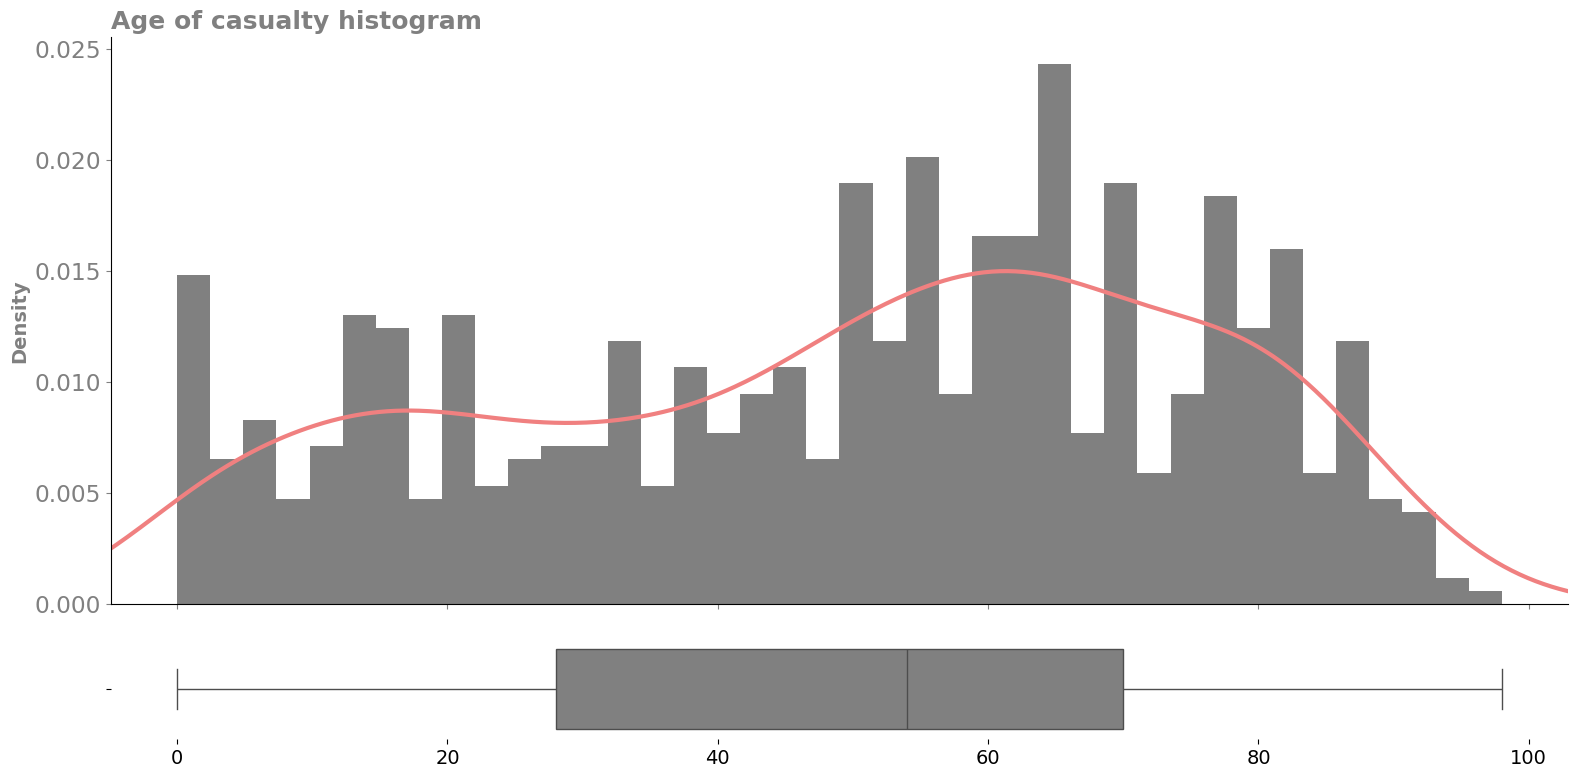

In [28]:
plot_numerical_histogram(df=df_bus,
                         col="age_of_casualty",
                         x_label="Age",
                         title="Age of casualty histogram",
                         )

### Categorical columns

In [29]:
sns.set_palette("mako")

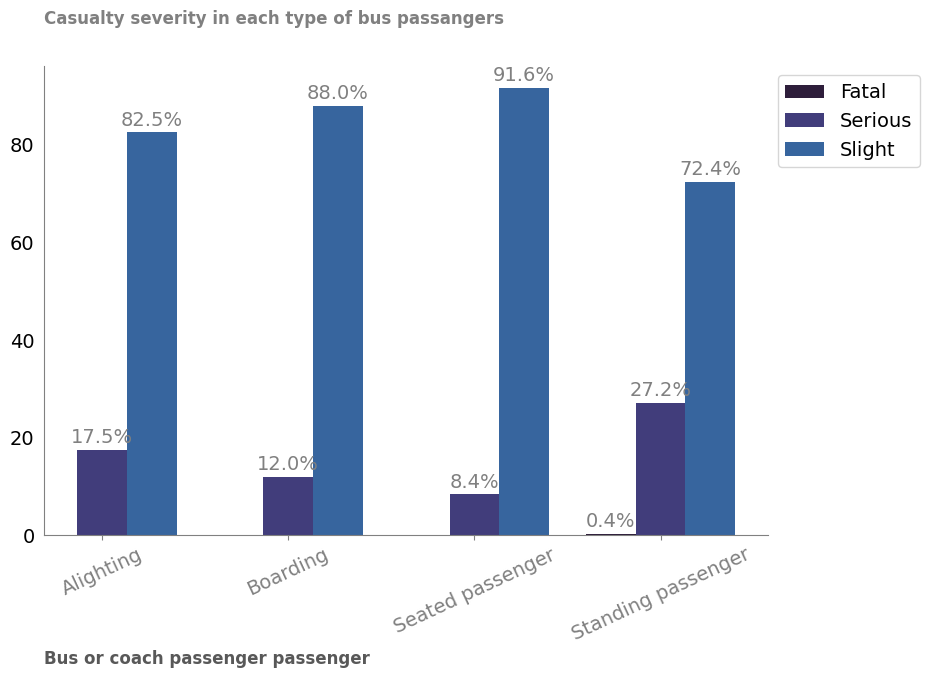

[<BarContainer object of 4 artists>,
 <BarContainer object of 4 artists>,
 <BarContainer object of 4 artists>]

In [39]:
plot_grouped_barplot(df=df_bus,
                     cols=['bus_or_coach_passenger', 'casualty_severity'],
                     x_label='Bus or coach passenger passenger',
                     title='Casualty severity in each type of bus passangers',
                     width=0.8,
                     annotate="values",
                     figsize=(8, 7),
                     rotation_angle=25)